In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [6]:
df = pd.read_csv('./data/data_processed_main.csv')

# Preprocessing v2

In [8]:
df.columns

Index(['adresDzialanosci_gmina', 'adresDzialanosci_miasto', '2712Z', '2790Z',
       '2841Z', '2899Z', '3312Z', '3320Z', '4321Z', 'pkd_total',
       'data_rozpoczecia', 'status', 'zamkniete_przez_covid'],
      dtype='object')

In [9]:
df.sample()

,adresDzialanosci_gmina,adresDzialanosci_miasto,2712Z,2790Z,2841Z,2899Z,3312Z,3320Z,4321Z,pkd_total,data_rozpoczecia,status,zamkniete_przez_covid
1021,Nowy Wiśnicz,Królówka,0,0,0,0,0,0,1,3,2021-09-22,AKTYWNY,0


In [10]:
df['data_rozpoczecia'] = pd.to_datetime(df['data_rozpoczecia'])
df['data_rozpoczecia_rok'] = df['data_rozpoczecia'].dt.year
df['data_rozpoczecia_miesiac'] = df['data_rozpoczecia'].dt.month
df = df.drop(['data_rozpoczecia'], axis=1)

In [9]:
#le_status = preprocessing.LabelEncoder()
#df['status'] = le_status.fit_transform(df['status'])

In [10]:
#list(le_status.classes_)

['AKTYWNY', 'WYKRESLONY', 'ZAWIESZONY']

In [11]:
df = df.drop(['status'], axis=1)

In [12]:
le_gminy = preprocessing.LabelEncoder()
le_miasta = preprocessing.LabelEncoder()
df['adres_gmina'] = le_gminy.fit_transform(df['adresDzialanosci_gmina'])
df['adres_miasto'] = le_miasta.fit_transform(df['adresDzialanosci_miasto'])
df = df.drop(['adresDzialanosci_gmina', 'adresDzialanosci_miasto'], axis=1)

In [13]:
df.sample(3)

,2712Z,2790Z,2841Z,2899Z,3312Z,3320Z,4321Z,pkd_total,zamkniete_przez_covid,data_rozpoczecia_rok,data_rozpoczecia_miesiac,adres_gmina,adres_miasto
8895,0,0,0,1,0,0,0,13,0,2018,5,244,554
41068,0,0,0,0,0,1,1,138,0,1992,4,98,802
22239,0,0,0,0,0,0,1,71,1,2008,8,160,1239


In [27]:
ilosc_firm_w_miescie = df['adres_miasto'].value_counts()
ilosc_firm_w_gminie = df['adres_gmina'].value_counts()

df['ilosc_firm_w_miescie'] = df['adres_miasto'].map(ilosc_firm_w_miescie)
df['ilosc_firm_w_gminie'] = df['adres_gmina'].map(ilosc_firm_w_gminie)

In [29]:
df.sample(3)

,2712Z,2790Z,2841Z,2899Z,3312Z,3320Z,4321Z,pkd_total,zamkniete_przez_covid,data_rozpoczecia_rok,data_rozpoczecia_miesiac,adres_gmina,adres_miasto,ilosc_firm_w_miescie,ilosc_firm_w_gminie
32024,0,0,0,0,0,0,1,18,0,2008,4,251,1958,528,1140
24973,0,0,0,0,0,0,1,33,0,2019,12,22,626,63,195
41922,1,1,0,0,1,1,0,160,0,2012,6,102,802,12962,1146


<AxesSubplot:xlabel='data_rozpoczecia_miesiac'>

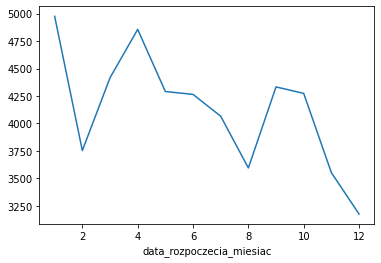

In [35]:
df.groupby(['data_rozpoczecia_miesiac'])['data_rozpoczecia_miesiac'].count().plot()

<AxesSubplot:ylabel='PKD'>

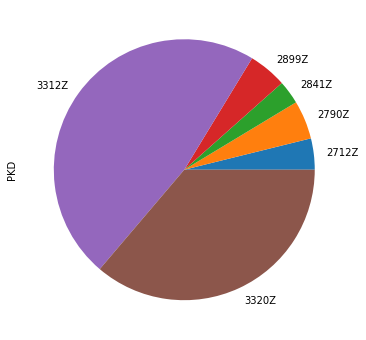

In [36]:
sums = df.sum()
sums = sums[:6]
sums.plot.pie(figsize=(6,6), ylabel='PKD')

In [37]:
import seaborn as sns

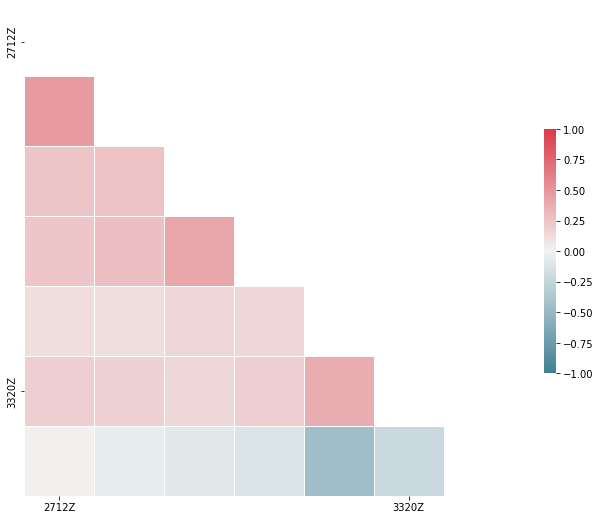

,2712Z,2790Z,2841Z,2899Z,3312Z,3320Z,4321Z
2712Z,1.000000,0.475053,0.242814,0.236008,0.105552,0.189679,0.015598
2790Z,0.475053,1.000000,0.257839,0.268165,0.106186,0.178492,-0.040840
2841Z,0.242814,0.257839,1.000000,0.406760,0.144354,0.149784,-0.084343
2899Z,0.236008,0.268165,0.406760,1.000000,0.147911,0.191575,-0.119285
3312Z,0.105552,0.106186,0.144354,0.147911,1.000000,0.382626,-0.460385
3320Z,0.189679,0.178492,0.149784,0.191575,0.382626,1.000000,-0.223316
4321Z,0.015598,-0.040840,-0.084343,-0.119285,-0.460385,-0.223316,1.000000


In [38]:
pkd_correlations = df[['2712Z', '2790Z', '2841Z', '2899Z', '3312Z', '3320Z', '4321Z']]

corr = pkd_correlations.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()
corr

# LEARNING

In [39]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop(['zamkniete_przez_covid'], axis=1)
y = df['zamkniete_przez_covid']

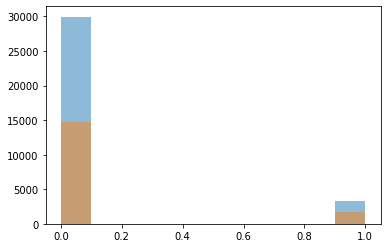

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
max_depth_params = np.arange(1, 14)
max_depth_best = 3
max_depth_best_score = 0

for max_depth_param in max_depth_params:
    tree = DecisionTreeClassifier(max_depth=max_depth_param, random_state=0)
    tree.fit(X_train, y_train)

    test_score = tree.score(X_test, y_test)

    print(f'max_depth={max_depth_param}')
    print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(test_score))
    print()

    if test_score > max_depth_best_score:
        max_depth_best = max_depth_param
        max_depth_best_score = test_score

print('-------------------------------')
print(f'Best max depth={max_depth_best}')
print(f'Max depth best score={max_depth_best_score}')


max_depth=1
Accuracy on training set: 0.903
Accuracy on test set: 0.897

max_depth=2
Accuracy on training set: 0.903
Accuracy on test set: 0.897

max_depth=3
Accuracy on training set: 0.903
Accuracy on test set: 0.897

max_depth=4
Accuracy on training set: 0.903
Accuracy on test set: 0.896

max_depth=5
Accuracy on training set: 0.903
Accuracy on test set: 0.895

max_depth=6
Accuracy on training set: 0.903
Accuracy on test set: 0.895

max_depth=7
Accuracy on training set: 0.904
Accuracy on test set: 0.895

max_depth=8
Accuracy on training set: 0.905
Accuracy on test set: 0.894

max_depth=9
Accuracy on training set: 0.906
Accuracy on test set: 0.891

max_depth=10
Accuracy on training set: 0.909
Accuracy on test set: 0.889

max_depth=11
Accuracy on training set: 0.913
Accuracy on test set: 0.882

max_depth=12
Accuracy on training set: 0.917
Accuracy on test set: 0.881

max_depth=13
Accuracy on training set: 0.923
Accuracy on test set: 0.876

-------------------------------
Best max depth=

In [45]:
objects = list(df.drop(['zamkniete_przez_covid'], axis=1).columns)

y_pos = np.arange(len(objects))
performance = tree.feature_importances_

print(objects)
print(performance)

['2712Z', '2790Z', '2841Z', '2899Z', '3312Z', '3320Z', '4321Z', 'pkd_total', 'data_rozpoczecia_rok', 'data_rozpoczecia_miesiac', 'adres_gmina', 'adres_miasto', 'ilosc_firm_w_miescie', 'ilosc_firm_w_gminie']
[0.00759424 0.00711301 0.00721593 0.00830004 0.0192976  0.02188705
 0.01271026 0.17432119 0.14012704 0.12299706 0.11594584 0.12801284
 0.12756145 0.10691644]


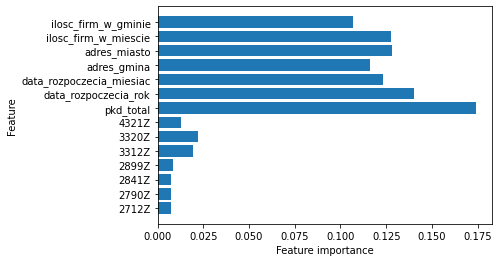

In [46]:
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.barh(y_pos, performance, align='center')
plt.yticks(y_pos, objects)
plt.show()

## Random forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
random_forest = RandomForestClassifier(n_estimators=50, max_leaf_nodes=2, n_jobs=-1, random_state=42)
random_forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(test_score))

Accuracy on training set: 0.923
Accuracy on test set: 0.876


In [49]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [52]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}